# Microseismic data

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append("..")
import splitwavepy as sw

from obspy import read
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
datahome = '/Users/glyjw/Data/HornRiver/S_Well/'
st = read(datahome + '20130806.040535.S_Well.015.?')

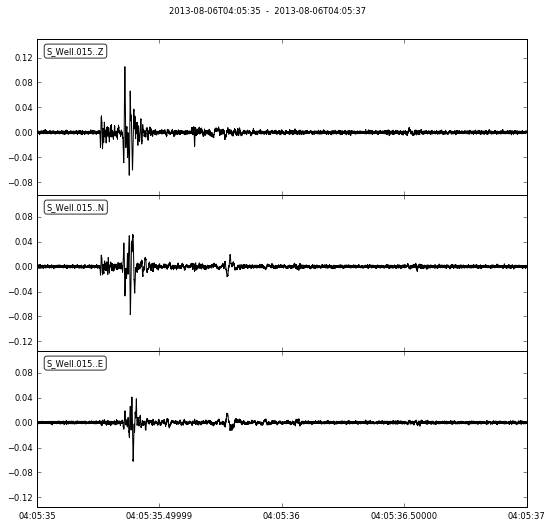

In [3]:
st.plot()

In [4]:
st[0].stats.sac['t1']

0.35075003

In [5]:
delta = st[0].stats.delta
t = sw.Trio(st[1].data,st[2].data,st[0].data,delta=delta)

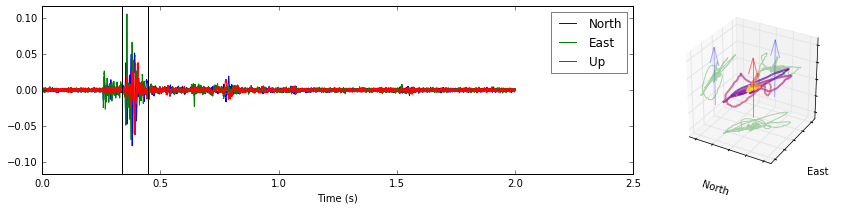

In [6]:
t.set_window(0.34,0.45,tukey=0.1)
t.plot()

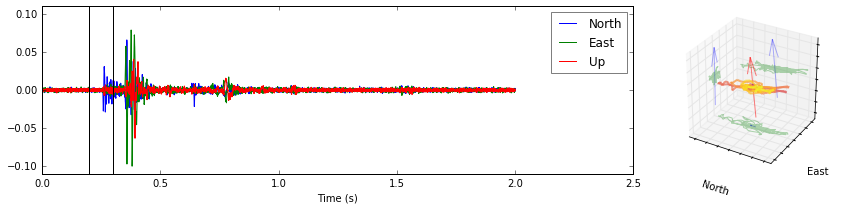

[[ 0.54513638  0.83232467  0.10030938]
 [ 0.83631642 -0.5482325   0.00399694]
 [-0.05831962 -0.08171151  0.99494827]]
[[ 0.54513638  0.83232467  0.10030938]
 [ 0.83631642 -0.5482325   0.00399694]
 [-0.05831962 -0.08171151  0.99494827]]
[[ 0.54513638  0.83232467  0.10030938]
 [ 0.83631642 -0.5482325   0.00399694]
 [-0.05831962 -0.08171151  0.99494827]]


In [18]:
# t.set_window(0.4,0.5)
# t.set_ray()
# t.rotate2ray()
# t.plot()

t.set_window(0.2,0.3)
t.set_ray()
t.rotate2ray()
t.plot()
print(t.cmpvecs)
print(t.eigvecs())
print(t.rayvecs)

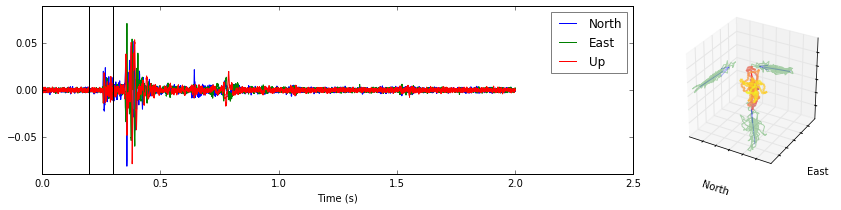

In [53]:
# t.set_window(0.2,0.3)
t.p_rotate()
t.plot()
# print(t.cmpvecs)

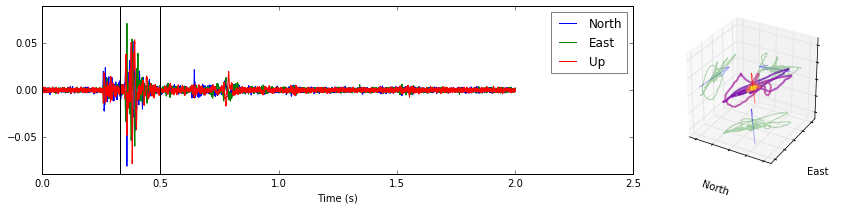

In [55]:
t.set_window(0.33,0.5)
t.plot()

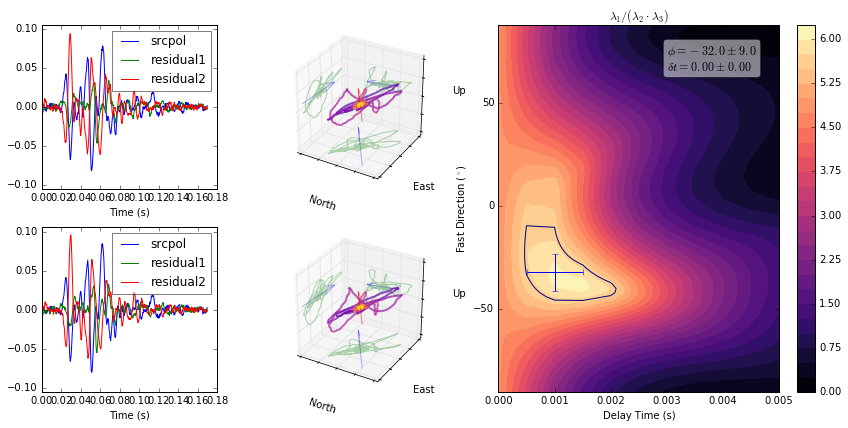

In [57]:
m = sw.Eig3dM(t,lags=(0.005,))
m.plot()

In [8]:
# get event info
from operator import itemgetter
keys = ['evla', 'evlo', 'evdp','stla','stlo','stdp']
evla, evlo, evdp, stla, stlo, stdp = itemgetter(*keys)(st[0].stats.sac)

In [9]:
dlo = stlo - evlo
dla = stla - evla
dz = evdp - stdp
# dz = stdp - evdp

azi = math.degrees( math.atan2( dlo, dla))
inc = math.degrees( math.atan2( (dlo**2+dla**2)**.5, dz))

print(azi,inc)

(-0.7651735990134442, 36.58074735860679)


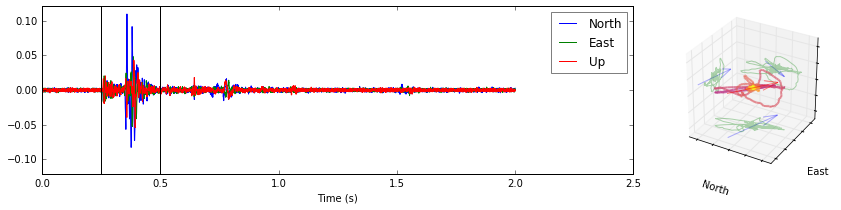

In [10]:
t.set_window(0.25,0.5)
# t = sw.Trio(st[1].data,st[2].data,st[0].data,delta=delta)
ev = t.eigvecs()
t.rotate2eig()
t.set_ray(ev[:,0])
t.plot()

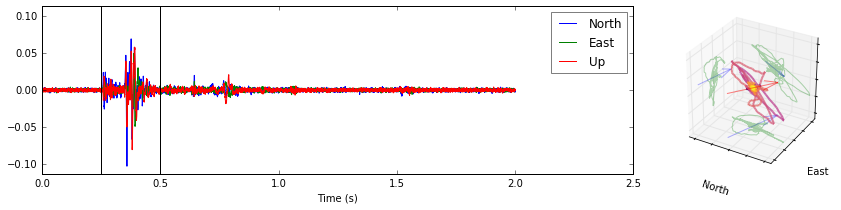

In [14]:
m = sw.Eig3dM(t)
m.plot()

In [ ]:
t.rotate2eye()
t.set_window(0.3,0.3)
# t.set_ray(azi,inc)
t.p_rotate()
t.plot()
# print(t.rayvecs)
# print(t.cmpvecs)


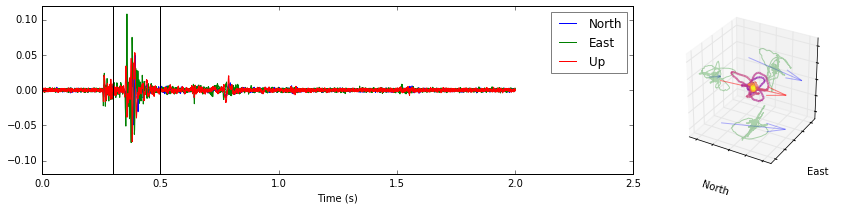

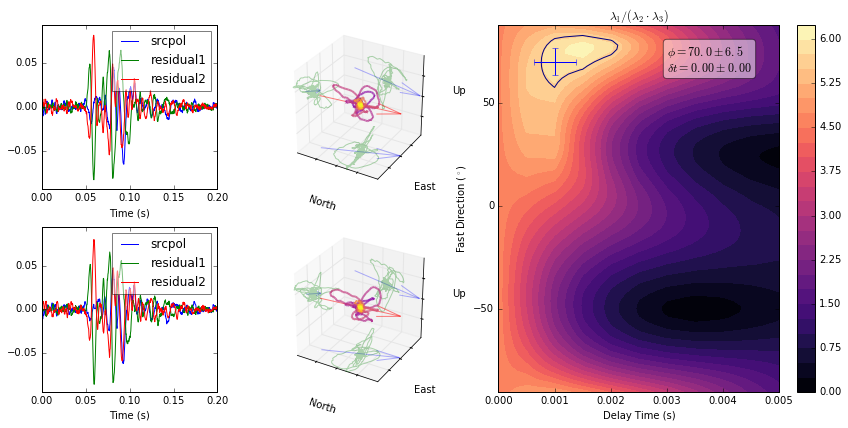

In [34]:
t.set_window(0.3,0.5)
t.plot()
m = sw.Eig3dM(t,lags=(0.005,))
m.plot()

In [ ]:
# t.cmpvecs
p = t.eigvecs()
p[:,0]
t.set_ray(p)
t.plot()

In [ ]:
# np.average(bs.stk_l1_l2,axis=0)

plt.contourf(m.tlags,m.degs,np.average(bs.stk_l1_l2,axis=0),26,cmap='magma')


In [ ]:
w2 = sw.Window(121,130)
# t.plot(window=w2)
tchop = t.copy()
tchop.chop(w2)
cov = np.cov(np.vstack((tchop.x,tchop.y,tchop.z)))
eigval, eigvec = np.linalg.eig(cov)
idx = np.argsort(eigval)[::-1]
eigval = eigval[idx]
eigvec = eigvec[:,idx]

In [ ]:
# rotate data into eigenvector system.
trot = t.copy()
trot.x,trot.y,trot.z = np.dot(eigvec.T,trot.xyz())
trot.plot(window=w2)

In [ ]:
np.co

In [ ]:
import colorcet as cc

In [ ]:
# the function to be plotted
def func(x,y):    
    # gives vertical color bars if x is horizontal axis
    return x

import pylab

# define the grid over which the function should be plotted (xx and yy are matrices)
xx, yy = pylab.meshgrid(
    pylab.linspace(-3,3, 101),
    pylab.linspace(-3,3, 111))

# indexing of xx and yy (with the default value for the
# 'indexing' parameter of meshgrid(..) ) is as follows:
#
#   first index  (row index)    is y coordinate index
#   second index (column index) is x coordinate index
#
# as required by pcolor(..)

# fill a matrix with the function values
zz = pylab.zeros(xx.shape)
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        zz[i,j] = func(xx[i,j], yy[i,j])

# plot the calculated function values
pylab.pcolor(xx,yy,zz)

# and a color bar to show the correspondence between function value and color
pylab.colorbar()

pylab.show() 

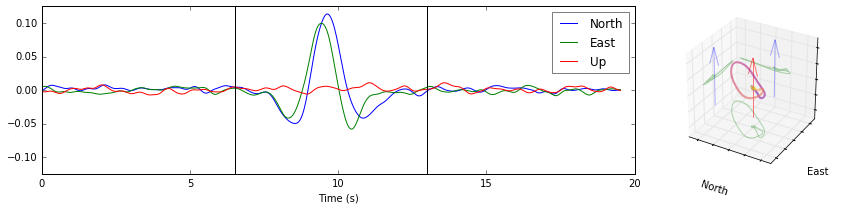

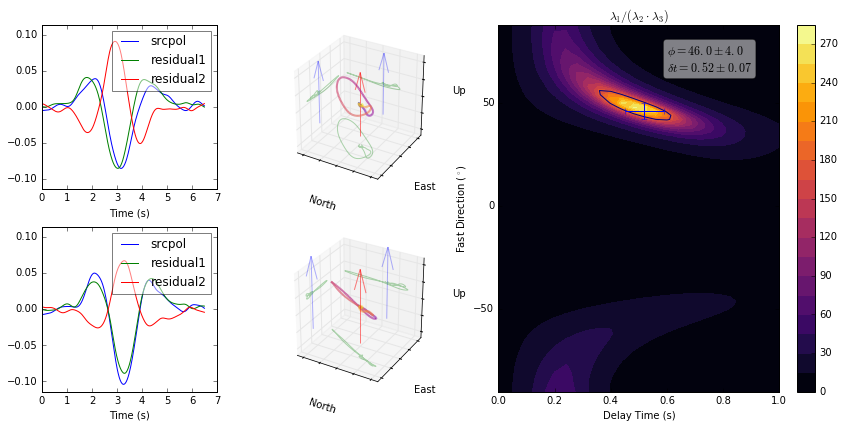

In [47]:
d = sw.Trio(split=(48,.5),delta=0.02,noise=0.02,pol=30)
d.plot()
m = sw.Eig3dM(d,lags=(1.,))
m.plot(cmap='inferno')

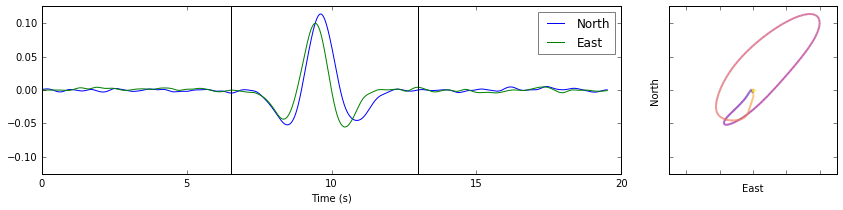

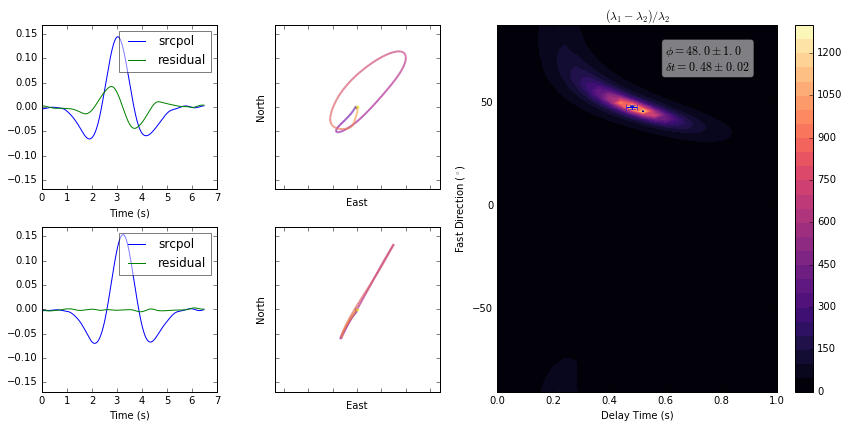

In [43]:
d = sw.Pair(split=(48,.5),delta=0.02,noise=0.01,pol=30)
d.plot()
m = sw.EigenM(d,lags=(1,))
m.plot()

In [ ]:
# srcside and rceiver splitting parameters
srcsplit = (  30, 1.3)
rcvsplit = ( -45, 1.7)

# Create synthetic
a = sw.Pair( split=([ srcsplit, rcvsplit]), noise=0.03, delta=0.02)

# standard measurement
m = sw.EigenM(a, lags=(3,))
m.plot()